# Ejercicios Pair Programming 
## Lección 17 - Regresión Logística Decision Tree

Hasta ahora hemos ajustado el modelo usando una Regresión Logística, pero como hemos aprendido, podemos usar el Decision Tree en este tipo de problemas. Los objetivos de este pair programming :

In [1]:
# Tratamiento de datos
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Modelado y evaluación
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score , cohen_kappa_score, roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV

# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Cargamos el dataframe
df = pd.read_csv("resultados_estudiantes_sin_estandarizar_codificados.csv", index_col=0)

In [3]:
df.head()

,gender,parental_level_of_education,test_preparation_course,math_score,reading_score,writing_score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,lunch_free/reduced,lunch_standard
0,0.0,4,1,72.0,72.0,74.0,0.0,1.0,0.0,0.0,0.0,0,1
1,0.0,3,0,69.0,90.0,88.0,0.0,0.0,1.0,0.0,0.0,0,1
2,0.0,5,1,90.0,95.0,93.0,0.0,1.0,0.0,0.0,0.0,0,1
3,1.0,2,1,47.0,57.0,44.0,1.0,0.0,0.0,0.0,0.0,1,0
4,1.0,3,1,76.0,78.0,75.0,0.0,0.0,1.0,0.0,0.0,0,1


Ajustad un modelo de Decision Tree a nuestros datos.

In [5]:
# Separamos los datos en X e y.

X = df.drop("gender", axis = 1)
y = df["gender"]


In [6]:
# Separamos en train y test.
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [8]:
# Creamos el objeto del modelo.
arbol = DecisionTreeClassifier(random_state =0)

# Ajustamos el modelo.
arbol.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

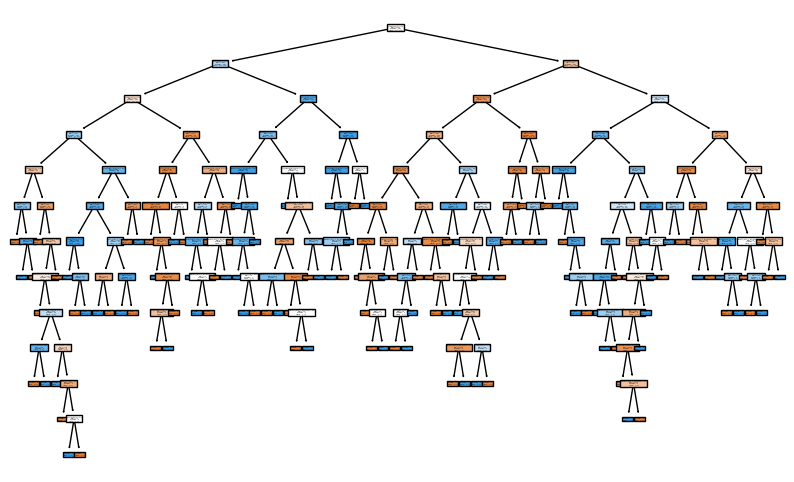

In [9]:
# Visualizamos el árbol de decisión
fig = plt.figure(figsize = (10,6))
tree.plot_tree(arbol, feature_names = x_train.columns, filled = True)
plt.show()

In [12]:
# Hacemos las predicciones sobre los dos set de datos el X_test y el X_train.
y_pred_test = arbol.predict(x_test)
y_pred_train = arbol.predict(x_train)

Calculad las métricas a nuestro nuevo modelo.

In [13]:
def metricas(clases_reales_test, clases_predichas_test, clases_reales_train, clases_predichas_train, modelo):
    
    # para el test
    accuracy_test = accuracy_score(clases_reales_test, clases_predichas_test)
    precision_test = precision_score(clases_reales_test, clases_predichas_test)
    recall_test = recall_score(clases_reales_test, clases_predichas_test)
    f1_test = f1_score(clases_reales_test, clases_predichas_test)
    kappa_test = cohen_kappa_score(clases_reales_test, clases_predichas_test)

    # para el train
    accuracy_train = accuracy_score(clases_reales_train, clases_predichas_train)
    precision_train = precision_score(clases_reales_train, clases_predichas_train)
    recall_train = recall_score(clases_reales_train, clases_predichas_train)
    f1_train = f1_score(clases_reales_train, clases_predichas_train)
    kappa_train = cohen_kappa_score(clases_reales_train, clases_predichas_train)
    

    
    df = pd.DataFrame({"accuracy": [accuracy_test, accuracy_train], 
                       "precision": [precision_test, precision_train],
                       "recall": [recall_test, recall_train], 
                       "f1": [f1_test, f1_train],
                       "kapppa": [kappa_test, kappa_train],
                       "set": ["test", "train"]})
    
    df["modelo"] = modelo
    return df

In [14]:
# sacamos las métricas para ver si hay overfitting o unerfitting, para modificar la profundidad en función de estos resultados

dt_results = metricas(y_test, y_pred_test, y_train, y_pred_train, "Decission Tree I")
dt_results

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.77551,0.8,0.752475,0.77551,0.551441,test,Decission Tree I
1,1.00000,1.0,1.000000,1.00000,1.000000,train,Decission Tree I


En este modelo de predición vemos que hay overfitting, es decir, el train es mucho mejor que el test, por lo que nuestro modelo se ha aprendido de memoria los datos y por tanto si se le introducen datos nuevos no funcionará. 

Para solucionar este problema reduciremos la profundidad de nuestro árbol modificando los hiperparámetros y utilizando el método GridSearchCV que ajusta nuestro modelo pasándole los valores de hiperparámetros que definamos.

In [15]:
# max features. Como vemos, debemos poner en nuestro modelo una profudidad máxima de 4. 

max_features = np.sqrt(len(x_train.columns))
max_features

3.4641016151377544

In [16]:
# max depth

print(arbol.tree_.max_depth)

12


In [19]:
# Definimos un diccionario con los hiperparámetros que queremos modificar y los valores que queremos. 

param = {"max_depth": [2, 4, 6, 8], 
        "max_features": [1, 2, 3],
        "min_samples_split": [10, 40, 90],
        "min_samples_leaf": [10, 40, 90]} 

In [20]:
# Iniciaremos el modelo con GridSearch.

gs = GridSearchCV(
            estimator=DecisionTreeClassifier(random_state= 42), 
            param_grid= param, 
            cv=10, 
            verbose=-1) 

In [21]:
# Ajustamos el modelo que acabamos de definir en el GridSearch.

gs.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [2, 4, 6, 8], 'max_features': [1, 2, 3],
                         'min_samples_leaf': [10, 40, 90],
                         'min_samples_split': [10, 40, 90]},
             verbose=-1)

In [22]:
# Utilizamos el método best_estimator_ para ver que modelo a partir de GridSearchCV es el mejor para nuestro estudio.
mejor_modelo = gs.best_estimator_
mejor_modelo

DecisionTreeClassifier(max_depth=8, max_features=3, min_samples_leaf=10,
                       min_samples_split=10, random_state=42)

Nos esta diciendo que el mejor modelo es aquel que tiene una profundidad de 8, que usa 3 variables predictoras para construir el modelo y que tiene un min_samples_leaf y un min_samples_split de 10 y un random_state de 42. 

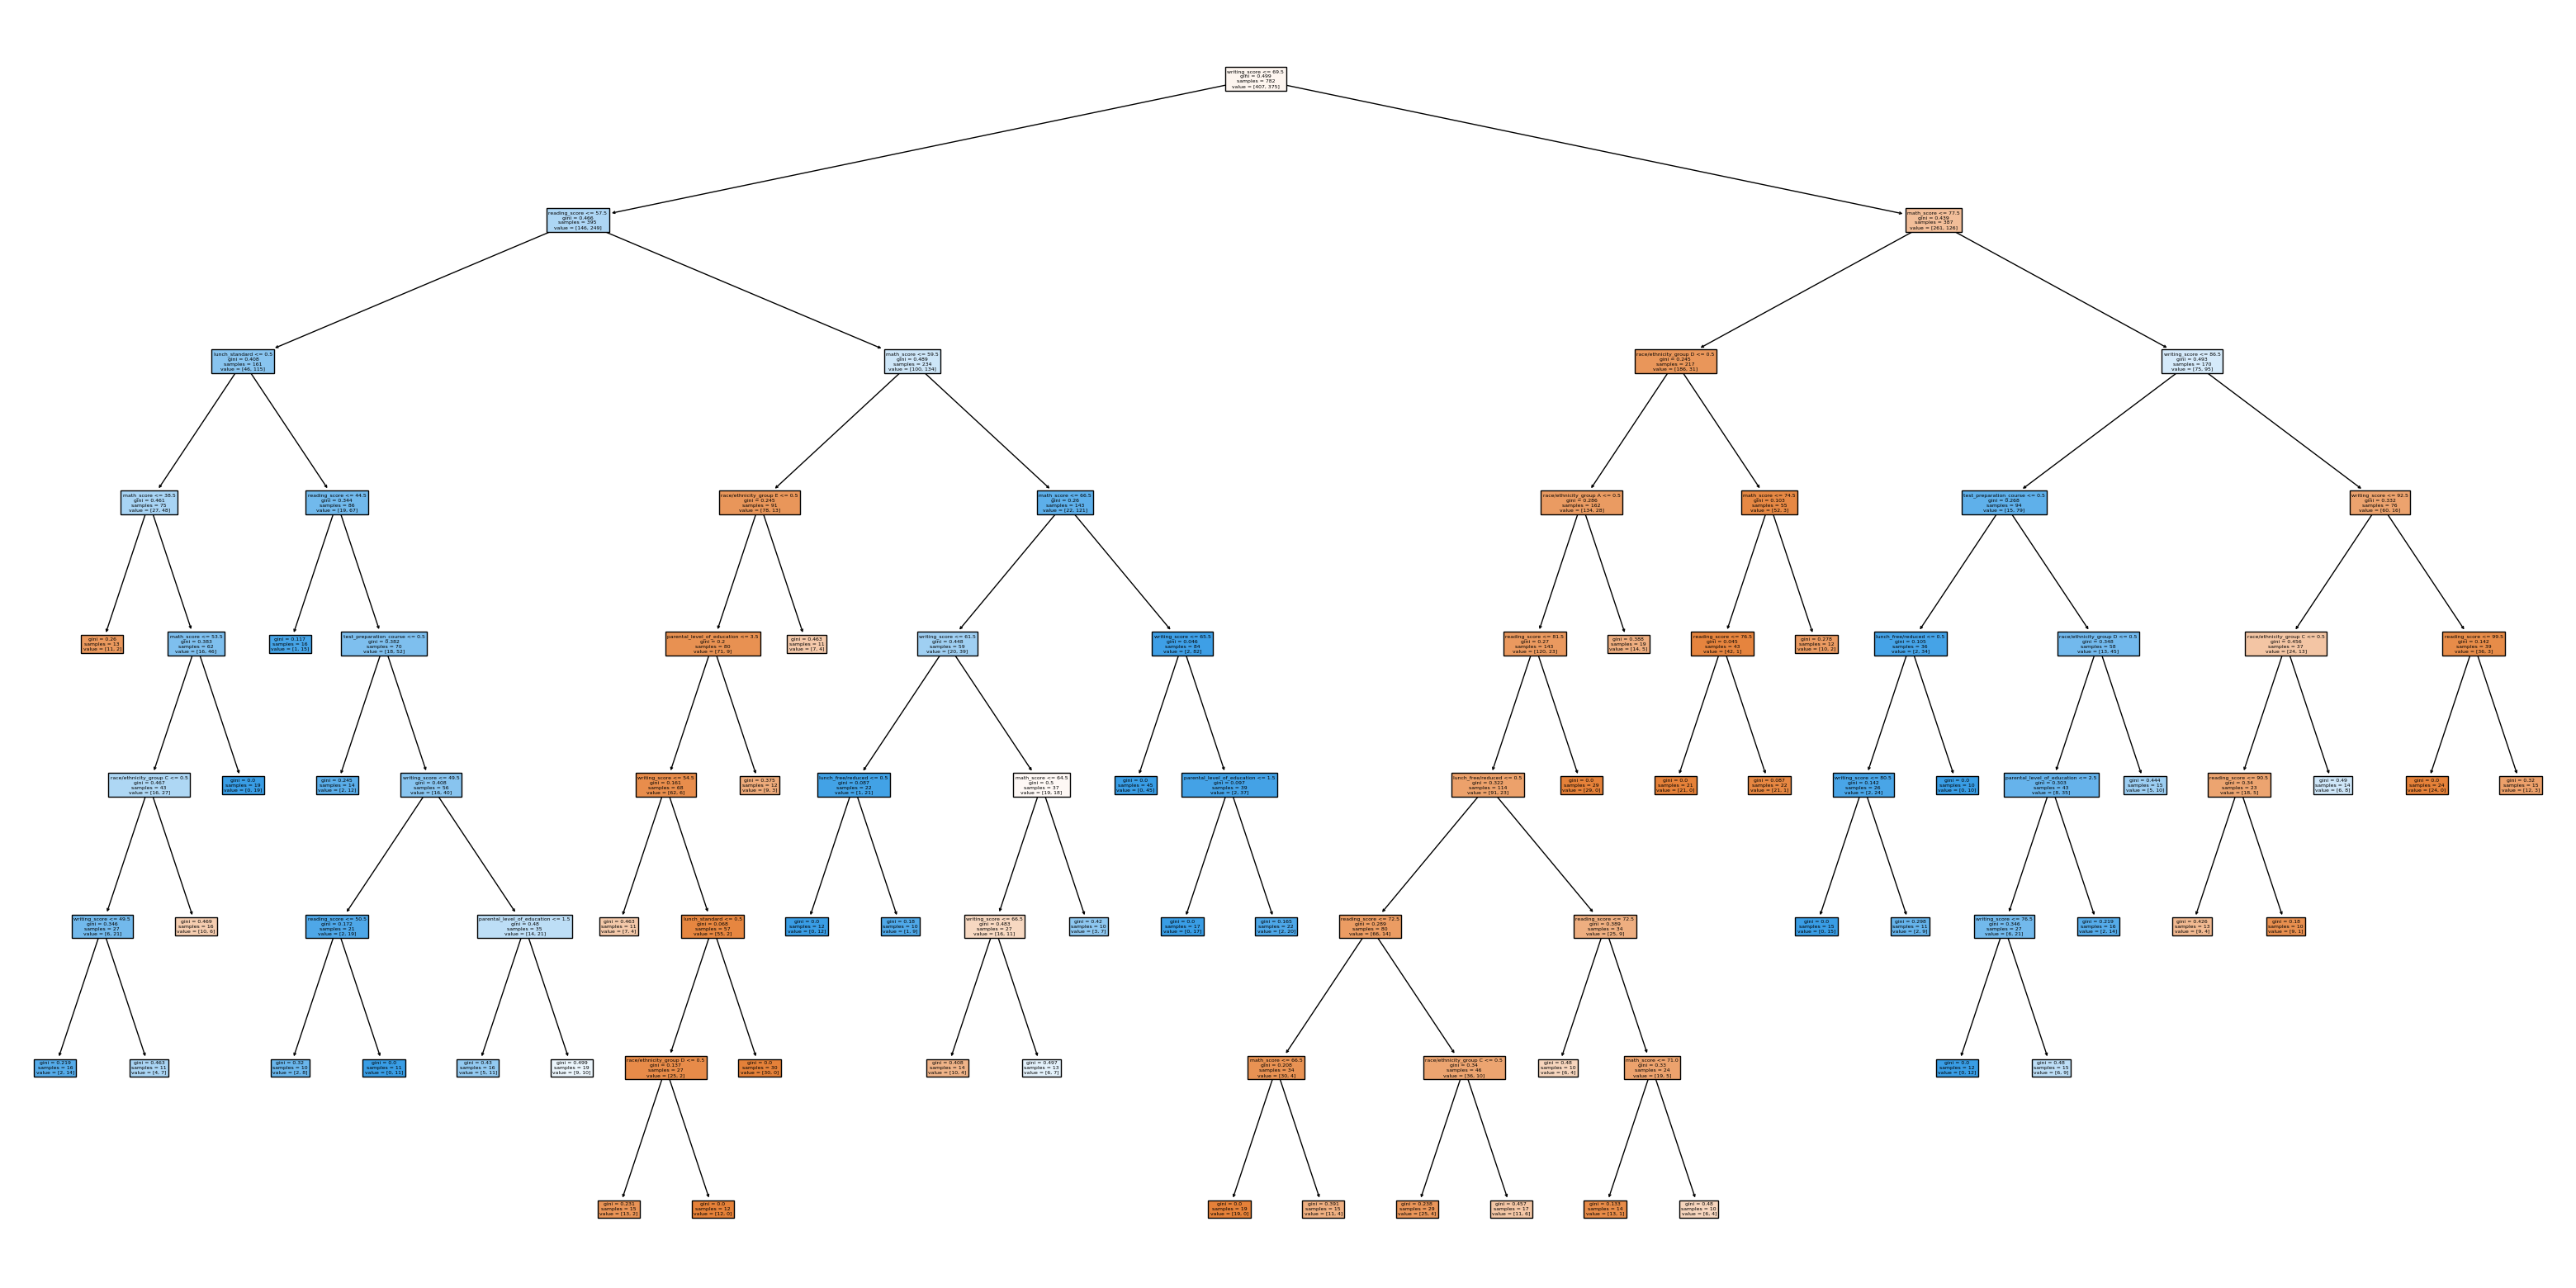

In [23]:
# Visualizamos el árbol que nos propone best_estimator_

fig = plt.figure(figsize=(40, 20))
tree.plot_tree(mejor_modelo, feature_names=x_train.columns, filled=True);

In [24]:
y_pred_test_2 = mejor_modelo.predict(x_test)
y_pred_train_2 = mejor_modelo.predict(x_train)

In [30]:
# Vemos las métricas de nuestro modelo Decision Tree II.

df_results2_decision = metricas(y_test, y_pred_test_2, y_train, y_pred_train_2, "Decision tree II")
df_results2_decision

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.795918,0.827957,0.762376,0.793814,0.592473,test,Decision tree II
1,0.843990,0.842818,0.829333,0.836022,0.687259,train,Decision tree II


En este modelo vemos que no hay overfitting porque aunque los valores del train son mayores que los del test no hay mucha diferencia entre éstos. 

Comparad las métricas con el modelo hecho hasta ahora. ¿Cuál es mejor?

In [29]:
# Cargaremos el csv de métricas que creamos en el pair anterior donde sacamos del modelo de regresión logística
# sus métricas para poder compararlo con éste. 

df_logistica_results = pd.read_csv("resultados_estudiantes_sin_estandarizar_codificados_metricas.csv", index_col = 0)
df_logistica_results

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.852041,0.882979,0.821782,0.851282,0.704451,test,Regresión logistica Sin Estandarizar
1,0.905371,0.905660,0.896000,0.900804,0.810345,train,Regresión logistica Sin Estandarizar


In [31]:
# Concatenamos los resultados.

df_resultados_todo = pd.concat([df_logistica_results, df_results2_decision], axis = 0).reset_index(drop=True)
df_resultados_todo

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.852041,0.882979,0.821782,0.851282,0.704451,test,Regresión logistica Sin Estandarizar
1,0.905371,0.905660,0.896000,0.900804,0.810345,train,Regresión logistica Sin Estandarizar
2,0.795918,0.827957,0.762376,0.793814,0.592473,test,Decision tree II
3,0.843990,0.842818,0.829333,0.836022,0.687259,train,Decision tree II


In [32]:
# Pongamos un poco de color a nuestro dataframe para ver la comparación de los datos de una forma un poco más amigable. 
df_resultados_todo.style.background_gradient(cmap='seismic')

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.852041,0.882979,0.821782,0.851282,0.704451,test,Regresión logistica Sin Estandarizar
1,0.905371,0.905660,0.896000,0.900804,0.810345,train,Regresión logistica Sin Estandarizar
2,0.795918,0.827957,0.762376,0.793814,0.592473,test,Decision tree II
3,0.843990,0.842818,0.829333,0.836022,0.687259,train,Decision tree II


Viendo los resultados obtenidos en las dos métricas que no tienen overfitting, consideramos que el mejor modelo para nuestro estudio es el "Regresión Logística Sin Estandarizar". Ya que los valores son más elevados que en el Decisión Tree sin una amplia diferencia entre el train y el test. 

Como hemos comentado en el pair anterior, a nosotras nos interesa el parámetro "recall" que nos da el porcentaje de casos positivos que fueron capturados, es decir, el porcentaje de mujeres que fueron detectadas. Si apreciamos la tabla vemos que este valor es superior en Regresión Logística Sin Estandarizar que en Decision Tree II. En el caso de la concordancia es bastante superior (un 10% más alto) en RLSE que en DTII. 

No nos deja lugar a dudas que nuestro mejor modelo para predecir si las mujeres obtienen mejores resultados será el modelo de Regresión Logística Sin Estandarizar.

In [33]:
# Guardamos el dataframe con todas las métricas para comparar en el próximo pair las métricas obtenidas en el Random Forest.

df_resultados_todo.to_csv("resultados_estudiantes_metricas_decision_sin_estandarizar.csv")

---

En el caso hipotético de que los resultados hubieran sido mejores en Decision Tree II que en Regresión Logística Sin Estandarizar este sería el siguiente que hubiéramos hecho para ver las variables predictoras más importantes.

In [43]:
# Vamos a crearnos un dataframe para ver cuál de nuestras variables predictoras es la más importante.
importancia_predictores = pd.DataFrame(
                            {'predictor': x_train.columns,
                             'importancia': mejor_modelo.feature_importances_}
                            )


# Ordenamos de mayor a menor los resultados.
importancia_predictores.sort_values(by=["importancia"], ascending=False, inplace = True)

# Printeamos los resultados.
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
2,math_score,0.496133
4,writing_score,0.393410
3,reading_score,0.041892
7,race/ethnicity_group C,0.028997
8,race/ethnicity_group D,0.008424
1,test_preparation_course,0.007753
11,lunch_standard,0.007689
0,parental_level_of_education,0.006012
9,race/ethnicity_group E,0.005499
10,lunch_free/reduced,0.002608


Como tenemos diferentes columnas nuevas por los métodos de codificación anteriormente realizados, agruparemos dichas columnas para saber el alcance global que tiene en nuestra variable respuesta.

In [44]:
# Nos creamos un dataframe con los valores solo race.
race = importancia_predictores.iloc[[3, 4, 8, 10, -1]]
race

,predictor,importancia
7,race/ethnicity_group C,0.028997
8,race/ethnicity_group D,0.008424
9,race/ethnicity_group E,0.005499
5,race/ethnicity_group A,0.001583
6,race/ethnicity_group B,0.000000


In [45]:
# Creamos otro dataframe solo con los valores de lunch.
lunch = importancia_predictores.iloc[[6,9]]
lunch

,predictor,importancia
11,lunch_standard,0.007689
10,lunch_free/reduced,0.002608


In [46]:
# Eliminamos esas filas del dataframe.

importancia_predictores.drop(race.index, inplace = True)
importancia_predictores.drop(lunch.index, inplace = True)

In [47]:
# Comprobamos que ya no aparecen en el dataframe de variables predictoras importantes.
importancia_predictores

,predictor,importancia
2,math_score,0.496133
4,writing_score,0.393410
3,reading_score,0.041892
1,test_preparation_course,0.007753
0,parental_level_of_education,0.006012


In [48]:
# Nos creamos nuevas filas con el resultado de la suma.

importancia_predictores.loc[5] =  ["race", race["importancia"].sum()]
importancia_predictores.loc[6] =  ["lunch", lunch["importancia"].sum()]

# Ordenamos el df.

importancia_predictores.sort_values(by = "importancia", ascending = False, inplace = True)
importancia_predictores

,predictor,importancia
2,math_score,0.496133
4,writing_score,0.393410
5,race,0.044503
3,reading_score,0.041892
6,lunch,0.010297
1,test_preparation_course,0.007753
0,parental_level_of_education,0.006012


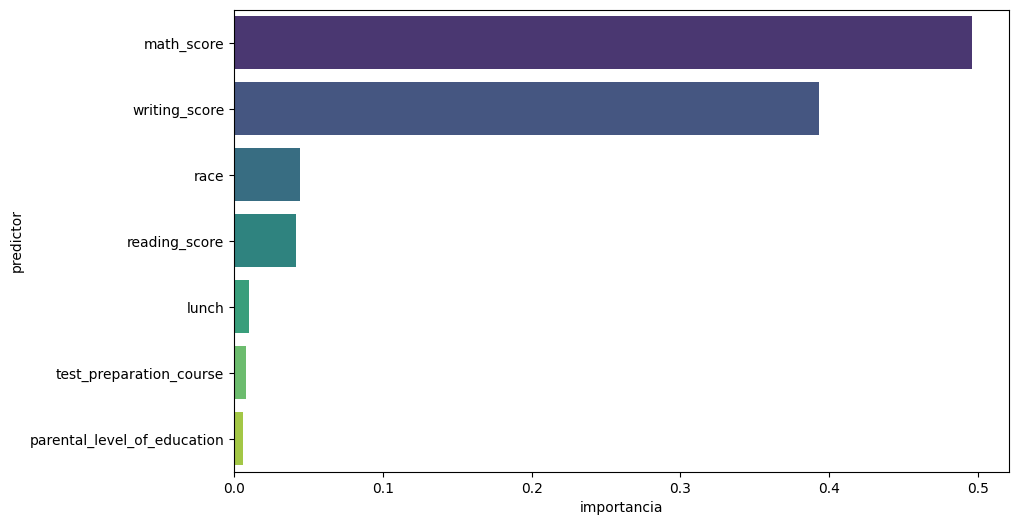

In [49]:
# Por último visualizamos los resultados con una gráfica de barplot. 

plt.figure(figsize=(10,6))
sns.barplot(x = "importancia", y = "predictor", data = importancia_predictores, palette="viridis");
plt.show()

En esta gráfica de barras lo que interpretamos es que nuestra variable respuesta (gender) está muy relacionada con los resultados matemáticos y los resultados de escritura (en primer y segundo lugar). Esto se puede dar porque, como hemos comentado en otra ocasión, las mujeres tenían las notas más altas en las asignaturas de letras, mientras que los hombres en las asignaturas de ciencias. 

Nos sorprende el orden de la importancia de los predictores (matemáticas, escritura, raza, lectura, comida, test preparatorio y nivel de educación parental). Lo que nos lleva a examinarlo con detenimiento. Nos damos cuenta que la raza tenía muchos grupos lo que hace que aumente su importancia en el estudio aunque no fue así considerada por nosotros. En el caso de reading score nos sorprende que no aparezca entre los tres primeros ya que lo consideramos una base importante tanto para las matemáticas como para la escritura (debería de estar, según nuestra opinión, en primer lugar). Las tres últimas variables predictoras vemos que tienen una importancia muy baja (cercana al 0) sorprendiéndonos que lunch esté por encima del curso preparatorio y del nivel educacional de los padres.

En conclusión, para nuestro estudio el peso de las respuestas está en matemáticas y en escritura, siendo el resto de las cinco variables predictoras datos anecdóticos. Por tanto, nuestro modelo llega a "buenas" predicciones teniendo en cuenta estas dos variables, es decir, sabremos si será mejor la mujer en los estudios analizando los resultados de las variables predictoras matemáticas y escritura. 

Happy coding 📊📈📉